### text DATA RDD 활용 word counting

In [109]:
# hdfs에서 text파일을 line별로 읽어와서 line의 문자 길이가 0보다 큰 경우만 객체로 저장
dataRDD = sc.textFile("/rdd/shakespeare.txt") \
            .filter(lambda x: len(x) > 0)
dataRDD.collect()

['THE SONNETS',
 'by William Shakespeare',
 'From fairest creatures we desire increase,',
 "That thereby beauty's rose might never die,",
 'But as the riper should by time decease,',
 'His tender heir might bear his memory:',
 'But thou contracted to thine own bright eyes,',
 "Feed'st thy light's flame with self-substantial fuel,",
 'Making a famine where abundance lies,',
 'Thy self thy foe, to thy sweet self too cruel:',
 "Thou that art now the world's fresh ornament,",
 'And only herald to the gaudy spring,',
 'Within thine own bud buriest thy content,',
 "And tender churl mak'st waste in niggarding:",
 'Pity the world, or else this glutton be,',
 "To eat the world's due, by the grave and thee.",
 'When forty winters shall besiege thy brow,',
 "And dig deep trenches in thy beauty's field,",
 "Thy youth's proud livery so gazed on now,",
 'Will be a tattered weed of small worth held:  ',
 'Then being asked, where all thy beauty lies,',
 'Where all the treasure of thy lusty days;',
 'T

In [110]:
import sys, re # 정규식 패키지
#영문자와 숫자 그리고 밑줄 문자 이외의 문자(== '\W+')가 1번이상 반복되면 그 자리에서 split
# split 기준이 되는 문자는 제거 되기 때문에 \W+ 기준 문자로 split하게 되면 특수기호(_ 제외)도 제거하게 됨

# map을 적용하면 2차원으로 반환
# dataRDD.map(lambda x : re.split("\W+", x)).collect()

# word counting을 하기 위해서는 1차원으로 데이터가 유지되어야 가능하므로
# 1차원으로 받기 위해서 평탄화 같이 진행
dataRDD.flatMap(lambda x : re.split("\W+", x)).collect()

['THE',
 'SONNETS',
 'by',
 'William',
 'Shakespeare',
 'From',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase',
 '',
 'That',
 'thereby',
 'beauty',
 's',
 'rose',
 'might',
 'never',
 'die',
 '',
 'But',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'decease',
 '',
 'His',
 'tender',
 'heir',
 'might',
 'bear',
 'his',
 'memory',
 '',
 'But',
 'thou',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes',
 '',
 'Feed',
 'st',
 'thy',
 'light',
 's',
 'flame',
 'with',
 'self',
 'substantial',
 'fuel',
 '',
 'Making',
 'a',
 'famine',
 'where',
 'abundance',
 'lies',
 '',
 'Thy',
 'self',
 'thy',
 'foe',
 'to',
 'thy',
 'sweet',
 'self',
 'too',
 'cruel',
 '',
 'Thou',
 'that',
 'art',
 'now',
 'the',
 'world',
 's',
 'fresh',
 'ornament',
 '',
 'And',
 'only',
 'herald',
 'to',
 'the',
 'gaudy',
 'spring',
 '',
 'Within',
 'thine',
 'own',
 'bud',
 'buriest',
 'thy',
 'content',
 '',
 'And',
 'tender',
 'churl',
 'mak',
 'st',
 'waste',
 'in',
 'niggarding',
 '',


In [111]:
# 문자 길이가 1개 이상인 경우만 추출
dataRDD.flatMap(lambda x : re.split("\W+", x)) \
        .filter(lambda x : len(x) > 1)

PythonRDD[118] at RDD at PythonRDD.scala:53

In [112]:
# 위에서 생성한 각 단어를 key로 value를 1로 갖는 pairRDD로 변환
# 단어,1로 맵 생성(모든 단어 소문자화)
dataRDD.flatMap(lambda x : re.split("\W+", x)) \
        .filter(lambda x : len(x) > 1) \
        .map(lambda x : (x.lower(), 1))

PythonRDD[119] at RDD at PythonRDD.scala:53

In [113]:
# 동일 단어 카운팅
dataRDD.flatMap(lambda x : re.split("\W+", x)) \
        .filter(lambda x : len(x) > 1) \
        .map(lambda x : (x.lower(), 1)) \
        .reduceByKey(lambda x, y : x+y)

PythonRDD[124] at RDD at PythonRDD.scala:53

In [114]:
# 카운팅 수가 많은 단어부터 내림차순 정렬
dataRDD.flatMap(lambda x : re.split("\W+", x)) \
        .filter(lambda x : len(x) > 1) \
        .map(lambda x : (x.lower(), 1)) \
        .reduceByKey(lambda x, y : x+y) \
        .sortBy(lambda x : x[1], ascending=False)

PythonRDD[135] at RDD at PythonRDD.scala:53

In [116]:
# 셰익스피어 소네트 워드카운팅
# 위 코드 모두 결합
import sys, re
dataRDD = sc.textFile("/rdd/shakespeare.txt") \
            .filter(lambda x: len(x) > 0) \
            .flatMap(lambda x : re.split("\W+", x)) \
            .filter(lambda x : len(x) > 1) \
            .map(lambda x : (x.lower(), 1)) \
            .reduceByKey(lambda x, y : x+y) \
            .sortBy(lambda x : x[1], ascending=False)
dataRDD

PythonRDD[161] at RDD at PythonRDD.scala:53

## Wordcounting 시각화
- 주어진 문자열에서 단어로 분리하고 각 단어별 계수하는 분석 방법
- 리뷰, 신문기사, 관공서 커뮤니티 게시글 등을 이용해서 많이 표현된 단어를 확인해서 현재 관심사 등을 확일할 때 사용하는 분석 방법

- 시각화
    - 그래프, 워드클라우드 등 활용

In [117]:
# !pip install wordcloud

In [118]:
from wordcloud import WordCloud
wordcnt = dataRDD.collect()
type(wordcnt) # 일반 파이썬 변수로
dict(wordcnt)
# WordCloud(width= , height= , background_color= , max_font_size= , max_words='표현되는 최대 단어 개수')
word_c = WordCloud(width=800, height=400, 
                   background_color="white", 
                   max_font_size=100, 
                   max_words=100)
# 실행해서 출력 (wordcloud 그릴 data 전달 // dict 형태로)
# WordCloud객체.generate_from_frequencies(data)
word_c.generate_from_frequencies(dict(wordcnt))
word_c.to_file("sonnet.jpg")

list

{'and': 490,
 'the': 432,
 'to': 414,
 'my': 393,
 'of': 370,
 'in': 323,
 'that': 323,
 'thy': 287,
 'thou': 235,
 'love': 194,
 'with': 181,
 'for': 172,
 'is': 170,
 'not': 167,
 'me': 164,
 'but': 163,
 'thee': 162,
 'so': 145,
 'be': 142,
 'as': 121,
 'all': 120,
 'you': 112,
 'it': 111,
 'which': 108,
 'his': 107,
 'when': 106,
 'this': 105,
 'your': 100,
 'by': 94,
 'doth': 88,
 'self': 88,
 'do': 84,
 'from': 82,
 'on': 80,
 'no': 79,
 'or': 79,
 'have': 77,
 'then': 74,
 'what': 73,
 'beauty': 70,
 'time': 70,
 'are': 69,
 'if': 68,
 'more': 64,
 'will': 64,
 'mine': 63,
 'their': 63,
 'shall': 59,
 'heart': 58,
 'sweet': 57,
 'eyes': 53,
 'nor': 52,
 'st': 52,
 'art': 52,
 'they': 52,
 'yet': 51,
 'her': 51,
 'than': 48,
 'now': 46,
 'thine': 44,
 'he': 44,
 'should': 44,
 'fair': 44,
 'can': 44,
 'make': 43,
 'one': 43,
 'hath': 43,
 'where': 41,
 'still': 41,
 'how': 40,
 'eye': 40,
 'true': 38,
 'him': 38,
 'like': 36,
 'am': 35,
 'see': 35,
 'though': 33,
 'world': 33,
 '

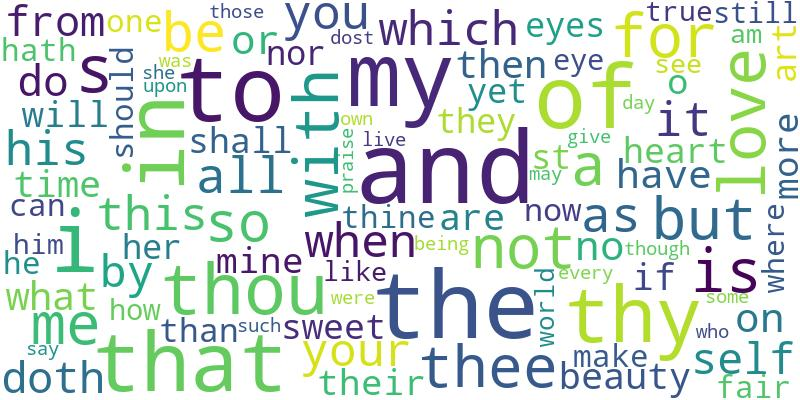

In [140]:
# nltk의 도움을 받아 명사만 카운팅해보자
# https://www.nltk.org/book/ch00.html#natural-language-toolkit-nltk 문서에서 태깅관련 모듈 확인하기
# https://www.nltk.org/book/ch05.html 문서에서 코드 따라하기
# 에러 발생할 경우 로그에서 nltk.download() 코드 복붙

# !pip install nltk

In [141]:
# # 필요한 tagger module 다운로드
# nltk.download("averaged_perceptron_tagger")
# nltk.download("punkt")
# nltk.download("punkt_tab")
# nltk.download("averaged_perceptron_tagger_eng") # 영어 단어 품사 구분

In [142]:
import nltk
from nltk.tokenize import word_tokenize
sonnets = sc.textFile('/rdd/shakespeare.txt')\
            .filter(lambda x : len(x) > 0).collect()

### map(참고)
- spark의 map은 scala나 python에서 제공하는 map과 크게 다르지 않다
- python에서 제공하는 map
    - 함수를 인자로 갖고,
    - 리스트와 같은 iterable 자료구조의 모든 요소에 그 함수를 적용시키고,
    - 그 결과로 구성된 map 객체를 다시 돌려줌
- spark의 map도 자료구조가 RDD라는 점이 다르고 작동은 비슷

In [179]:
## sonnets 각 라인별문장에 대해서 word_tokenize()를 적용한 결과를 돌려줌
## word_tokenize()함수는 nltk.tokenize()함수를 호출하는 래커함수 : 공백과 .을 기준으로 단어 분할(.은 버리지 않는다)
sonnets_token = map(lambda t : word_tokenize(t), sonnets)
# list(map(lambda t : word_tokenize(t), sonnets))
# 1 : 공백 기준 분리
# 특수 기호 만나면 특수기호에서 분리
# increase : increase 단어와, 특수기호로 분리
# 특수기호는 유지됨

In [180]:
# 위에서 생성한 token map객체의 내부 원소 각각에 대해 nltk.pos_tag 진행
# pos_tag() 함수 : 토큰화 된 단어를 품사 분류함수 (NN  : 명사)
# sonnets_token : map객체(1차원 객체)
tmp = map(lambda t : nltk.pos_tag(t), sonnets_token)
# list(map(lambda t : nltk.pos_tag(t), sonnets_token))

tagged = list(tmp) # 토큰별로 품사태킹이 되어 있는 2차원 data가 저장
# tagged

In [171]:
# 품사 태킹 data rdd 객체로 변환 -> 1차원으로 변경
sc.parallelize(tagged) \
    .flatMap(lambda x : x) \
    # .collect()

PythonRDD[381] at RDD at PythonRDD.scala:53

In [172]:
# 품사가 NN(명사)인 data만 추출해서 data 별로 counting할 예정 -> value 변경 후, counting

sc.parallelize(tagged) \
    .flatMap(lambda x : x) \
    .filter(lambda x : x[1]=="NN") \
    # .collect()

# 위에서 생성된 rdd에서 key data만 추출하고 pairRDD를 (key, 1)형태로 변환
sc.parallelize(tagged) \
    .flatMap(lambda x : x) \
    .filter(lambda x : x[1]=="NN") \
    .map(lambda x : (x[0].lower,1)) \
    # .collect()

# key 별로 그룹화 -> counting
sc.parallelize(tagged) \
    .flatMap(lambda x : x) \
    .filter(lambda x : x[1]=="NN") \
    .map(lambda x : (x[0].lower(),1)) \
    .reduceByKey(lambda x, y : x+y) \
    # .collect()

PythonRDD[383] at RDD at PythonRDD.scala:53

PythonRDD[385] at RDD at PythonRDD.scala:53

PythonRDD[391] at RDD at PythonRDD.scala:53

In [173]:
word_cntNN = sc.parallelize(tagged) \
    .flatMap(lambda x : x) \
    .filter(lambda x : x[1]=="NN") \
    .map(lambda x : (x[0].lower(),1)) \
    .reduceByKey(lambda x, y : x+y) \
    # .collect()

# rdd -> text 파일로 hdfs에 쓰기
# word_cntNN.saveAsTextFile("/rdd/word_cntNN")

In [181]:
word_cntNN = sc.parallelize(tagged) \
    .flatMap(lambda x : x) \
    .filter(lambda x : x[1]=="NN") \
    .map(lambda x : (x[0].lower(),1)) \
    .reduceByKey(lambda x, y : x+y) \
    .sortBy(lambda x : x[1], ascending=False) \
    # .collect()
word_cntNN
# rdd -> text 파일로 hdfs에 쓰기
# word_cntNN.saveAsTextFile("/rdd/word_cntNN_sorted")

PythonRDD[422] at RDD at PythonRDD.scala:53

In [175]:
## 명사만 추출
#아래 코드 실행 과정

In [182]:
word_cntNN.collect()

[('love', 126),
 ('thee', 96),
 ('thou', 88),
 ('beauty', 65),
 ('self', 57),
 ('heart', 57),
 ('time', 53),
 ('art', 42),
 ('eye', 40),
 ('world', 32),
 ('mine', 28),
 ('hath', 27),
 ('doth', 27),
 ('day', 26),
 ('life', 24),
 ('truth', 22),
 ('night', 22),
 ('praise', 22),
 ('part', 20),
 ('face', 19),
 ('thine', 19),
 ('summer', 19),
 ('nothing', 18),
 ('hand', 18),
 ('death', 18),
 ('dost', 18),
 ('age', 17),
 ('sight', 17),
 ('worth', 17),
 ('mind', 17),
 ('name', 16),
 ('thy', 16),
 ('friend', 15),
 ('youth', 14),
 ('none', 13),
 ('hate', 13),
 ('state', 13),
 ('nature', 12),
 ('thing', 12),
 ('tongue', 12),
 ('earth', 12),
 ('verse', 12),
 ('sun', 12),
 ('pleasure', 11),
 ('mayst', 11),
 ('fair', 11),
 ('pride', 11),
 ('thought', 11),
 ('ill', 11),
 ('end', 11),
 ('show', 10),
 ('place', 10),
 ('heaven', 10),
 ('soul', 10),
 ('fire', 10),
 ('spirit', 10),
 ('glass', 10),
 ('form', 10),
 ('sweet', 10),
 ('kind', 10),
 ('desire', 9),
 ('mistress', 9),
 ('woe', 9),
 ('hast', 9),
 (

In [183]:
from wordcloud import WordCloud

word_c = WordCloud(width=800, height=400, 
                   background_color="white", 
                   max_font_size=100, 
                   max_words=100)

word_c.generate_from_frequencies(dict(word_cntNN.collect()))
word_c.to_file("sonnet_nn.jpg")

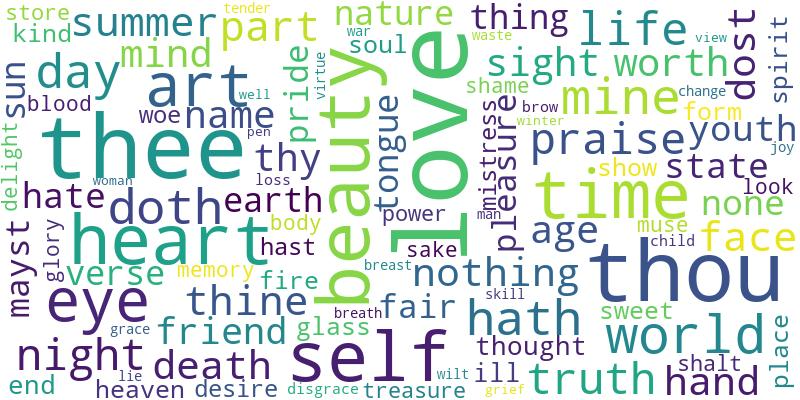

In [15]:
## 위 코드 모두 결합


In [16]:
#from wordcloud import WordCloud



- 결론 :  소네트는 사랑에 대한 이야기를 하는 시이다.
- 사랑 이야기 하는데 death가 자주 쓰인 것으로 보아 셰익스피어는 90년대 한국대중가요 감성이다.
